# Wheat Seed Data Set 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wt =pd.read_csv("F:\wheat-seeds.csv")

In [3]:
wt.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
wt.shape

(210, 8)

In [5]:
#Type of Label Values
wt['Type'].value_counts()

3    70
2    70
1    70
Name: Type, dtype: int64

# Exploratory Data Analysis

In [6]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             210 non-null    float64
 1   Perimeter        210 non-null    float64
 2   Compactness      210 non-null    float64
 3   Kernel.Length    210 non-null    float64
 4   Kernel.Width     210 non-null    float64
 5   Asymmetry.Coeff  210 non-null    float64
 6   Kernel.Groove    210 non-null    float64
 7   Type             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [7]:
wt.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

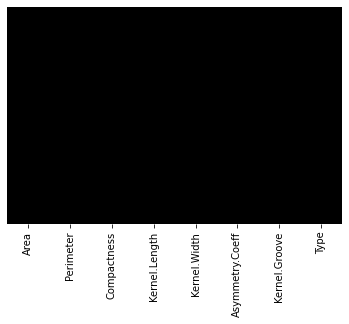

In [8]:
import seaborn as sns
sns.heatmap(wt.isnull(),yticklabels=False,cbar=False,cmap='Greys_r')

In [9]:
wt.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [10]:
wt.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
Perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
Compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
Kernel.Length,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
Kernel.Width,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
Asymmetry.Coeff,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
Kernel.Groove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
Type,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


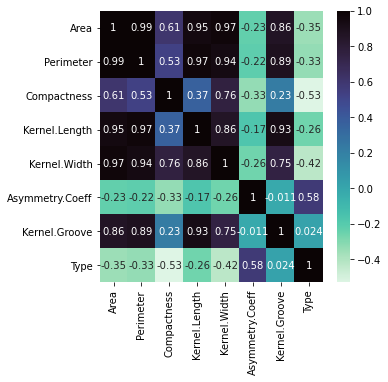

In [11]:
#Correlations of each features in dataset using heat map
import seaborn as sns
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(wt.corr(),annot=True,cmap="mako_r")

# Splitting Features and Labels (i,e: x & y)

In [12]:
x = wt.iloc[:,:7]
y = wt.iloc[:,7]

In [13]:
x.shape

(210, 7)

In [14]:
y.shape

(210,)

In [15]:
# Feature Scaling

In [16]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)
x

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

# 1) Hyperparameter tuning using GridsearchCV

In [17]:
k_range = list(range(1,25))
weight_options = ["uniform", "distance"]
metric_K = ["euclidean","manhattan"]
param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_K)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [19]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(knn, param_grid, cv = 5,verbose = 1, n_jobs = -1)
grid.fit(x,y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    3.5s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [20]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9285714285714285
{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}
KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')


# Splitting the data into training & testing

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 10)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(168, 7)
(168,)
(42, 7)
(42,)


# Training and Predicting

In [23]:
knnmodel = KNeighborsClassifier(n_neighbors = 6,metric='euclidean',weights='uniform')
knnmodel.fit(x_train,y_train)
ypredict = knnmodel.predict(x_test)

# Accuracy_score & confusion_matrix

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypredict)

0.9761904761904762

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypredict)

array([[15,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 10]], dtype=int64)

# 2) LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [27]:
ypredict = lr.predict(x_test)

In [28]:
#accuracy 
accuracy_score(y_test,ypredict)

0.9761904761904762

In [29]:
#confusion_matrix
confusion_matrix(y_test,ypredict)

array([[15,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 10]], dtype=int64)

In [30]:
print("training accuracy :", lr.score(x_train, y_train))
print("testing accuracy :", lr.score(x_test, y_test))

training accuracy : 0.9345238095238095
testing accuracy : 0.9761904761904762


# 3) Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression
LiR = LinearRegression()
LiR.fit(x_train,y_train)

LinearRegression()

In [32]:
LiR = LinearRegression()
LiR.fit(x_train,y_train)

LinearRegression()

In [33]:
from sklearn.metrics import r2_score
r2_score(ypredict,y_test)

0.8438661710037174

# 4) DecisionTree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [36]:
#accuracy
accuracy_score(y_test,y_pred)

0.9523809523809523

In [37]:
#confusion_matrix
confusion_matrix(y_test,ypredict)

array([[15,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 10]], dtype=int64)

# 5) Random Forest with Hyperparameter tuning using RandomSearchCV

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [39]:
#hyperparameters values
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(5, 9),
    'max_features':randint(1, 9),
    'min_samples_leaf':randint(1, 9),
    'n_estimators':randint(100,250)
}
#### initial model
RF = RandomForestClassifier()

random_search = RandomizedSearchCV(RF,param_distributions = params,cv = 10)

In [40]:
random_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 765, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B44BD4BB50>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B44BE17190>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B44BE17340>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B44BE17550>})

In [41]:
print(random_search.best_params_)
print(random_search.best_estimator_)
print(random_search.best_score_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 7, 'min_samples_leaf': 3, 'n_estimators': 115}
RandomForestClassifier(max_depth=8, max_features=7, min_samples_leaf=3,
                       n_estimators=115)
0.9102941176470587


In [42]:
best_random = random_search.best_estimator_

In [43]:
y_pred = best_random.predict(x_test)

In [44]:
#accuracy
accuracy_score(y_test,y_pred)

0.9761904761904762

In [45]:
#confusion_matrix
confusion_matrix(y_test,ypredict)

array([[15,  0,  1],
       [ 0, 16,  0],
       [ 0,  0, 10]], dtype=int64)

# 6) AdaBoostClassifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [47]:
ada = AdaBoostClassifier(base_estimator=None,n_estimators=109,learning_rate=0.1)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

In [48]:
#accuracy
accuracy_score(y_test,y_pred)

0.6190476190476191

# 7) GradientBoostingClassifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1)
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)

In [51]:
#accuracy
accuracy_score(y_test,y_pred)

0.9761904761904762

# 8) xgboost

In [52]:
!pip install xgboost

In [53]:
import xgboost as xgb

In [54]:
xgbo = xgb.XGBClassifier()
xgbo.fit(x_train,y_train)

[15:00:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
xgbo.score(x,y)

0.9952380952380953

In [56]:
xgbo.score(x_test,y_test)

0.9761904761904762

In [57]:
y_pred = xgbo.predict(x_test)

In [58]:
#accuracy
accuracy_score(y_test,y_pred)

0.9761904761904762

# 9)SVM Classifier

In [59]:
from sklearn.svm import SVC

In [60]:
#1) Linear Kernel
svclassifier = SVC(kernel = 'linear', random_state = 0,C=10, gamma=0.1)
svclassifier.fit(x_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear', random_state=0)

In [61]:
y_pred = svclassifier.predict(x_test)

In [62]:
#accuracy
accuracy_score(y_test,y_pred)

1.0

In [63]:
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 10]], dtype=int64)

In [64]:
#2) polynomial kernel
svclassifier = SVC(kernel='poly',degree=5,gamma=0.1,random_state =0,C=10)
svclassifier.fit(x_train, y_train)

SVC(C=10, degree=5, gamma=0.1, kernel='poly', random_state=0)

In [65]:
y_pred = svclassifier.predict(x_test)

In [66]:
#confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 4, 12,  0],
       [ 2,  0,  8]], dtype=int64)

In [67]:
#accuracy
accuracy_score(y_test,y_pred)

0.8571428571428571

In [68]:
#3) Gaussian Kernel
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)

SVC()

In [69]:
y_pred = svclassifier.predict(x_test)

In [70]:
#confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[15  0  1]
 [ 0 16  0]
 [ 0  0 10]]


In [71]:
#accuracy
accuracy_score(y_test,y_pred)

0.9761904761904762

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        16
           3       0.91      1.00      0.95        10

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.97        42
weighted avg       0.98      0.98      0.98        42

